# Task One 

## Simple Techniques:

* Max Voting
* Averaging
* Weighted Average

## Advanced Techniques:
* Bagging (Bootstrap AGGregatING)
* Boosting
* Stacking

In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()

x , y = wine.data[:, 11:13], wine.target

In [3]:
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
clf.score(x,y)

1.0

In [6]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator = clf, max_samples = 0.1, max_features = 0.1, n_estimators = 10)

In [7]:
bg.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [9]:
bg.score(x,y)

0.8314606741573034

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


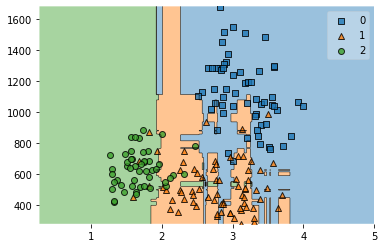

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y,bg)

# Task Two

## Bagging algorithms:

* Bagging meta-estimator
* Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)

In [13]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf.score(x,y)

0.9943820224719101

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


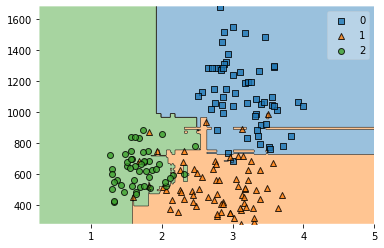

In [15]:
plot_decision_regions(x,y, rf)

# Task Three

0.601123595505618


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


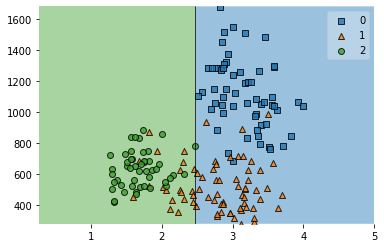

0.7303370786516854


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


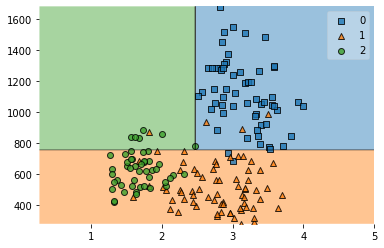

0.8595505617977528


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


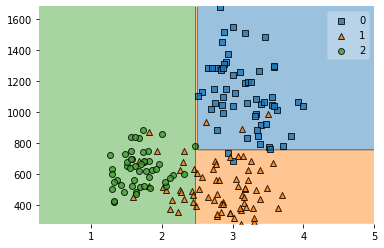

0.8595505617977528


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


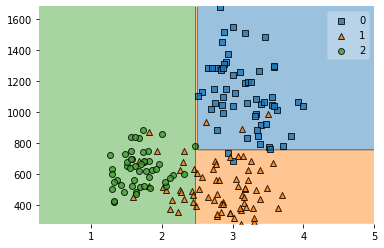

In [19]:
from sklearn.ensemble import  AdaBoostClassifier
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

n_est = [1,2,5,10]

for num_est in n_est:
  clf_boost = AdaBoostClassifier(clf, n_estimators=num_est)
  clf_boost.fit(x,y)
  print(clf_boost.score(x,y))
  plot_decision_regions(x,y,clf_boost)
  plt.show()

# Task Four

## Boosting algorithms:

* AdaBoost : Adaptive boosting
* GBM : Gradient Boosting
* XGBM : Extreme Gradient Boosting
* Light GBM
* CatBoost

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train,y_train)

model.score(x_test,y_test)


0.8333333333333334

In [25]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9074074074074074

# Task Five

## Ensemble Learning:
* Homogeneous ensemble methods : Bagging , Boosting
* Heterogeneous ensemble methods: Stacking

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [27]:
clfk = KNeighborsClassifier(n_neighbors=1)
clfg = GaussianNB()
clfr = RandomForestClassifier()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clfk, clfg, clfr], meta_classifier= lr)

Acc 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


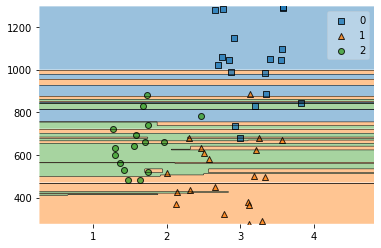

Acc 0.9074074074074074


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


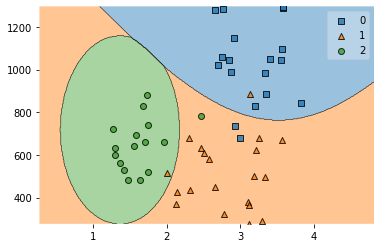

Acc 0.8888888888888888


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


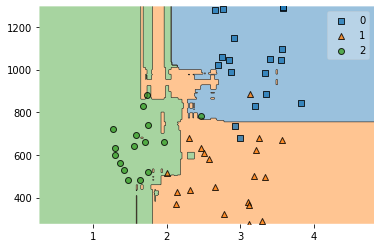

Acc 0.8703703703703703


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


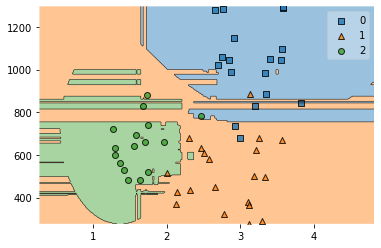

In [31]:
clf = [clfk, clfg, clfr, sclf]

for classifier in clf:
  classifier.fit(x_train,y_train)
  print('Acc', classifier.score(x_test,y_test))

  plot_decision_regions(x_test,y_test,classifier)
  plt.show()
